<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Model-Validation/Extra_Tress_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extra trees classifier - Model validation

In [ ]:
!pip install dask[dataframe]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, mean_absolute_error, cohen_kappa_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:
df = pd.read_csv('/content/combined_dataset_FS2.csv')
df

,Unnamed: 0,APC2D1_C_N,APC2D1_C_O,APC2D2_N_O,APC2D3_C_N,APC2D4_C_X,APC2D5_N_X,APC2D5_O_F,APC2D7_N_O,APC2D7_O_O,...,AD2D336,AD2D404,AD2D414,AD2D482,AD2D492,AD2D559,AD2D560,AD2D569,AD2D570,AD2D704
0,0,1,3,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,2,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,1,2,2,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,1,2,2,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,1,2,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1224,3,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,1225,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,1226,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,1227,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
X = df.drop(["class"], axis=1)
Y = df["class"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [ ]:
# Initialize and Train ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, Y_train)
y_pred = et.predict(X_test)
y_pred_proba = et.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)
clf_report = classification_report(Y_test, y_pred)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
mae = mean_absolute_error(Y_test, y_pred)
kappa = cohen_kappa_score(Y_test, y_pred)

In [ ]:
# Print Results
print("ExtraTreesClassifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Classification Report:\n{clf_report}")
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")

ExtraTreesClassifier Evaluation Metrics:
Accuracy: 0.8428
AUC: 0.9060
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       230
           1       0.84      0.72      0.78       139

    accuracy                           0.84       369
   macro avg       0.84      0.82      0.83       369
weighted avg       0.84      0.84      0.84       369


Confusion Matrix:
[[211  19]
 [ 39 100]]

Sensitivity (Recall): 0.7194
Mean Absolute Error (MAE): 0.1572
Cohen's Kappa Score: 0.6555


In [ ]:
# ROC Curve Plot
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

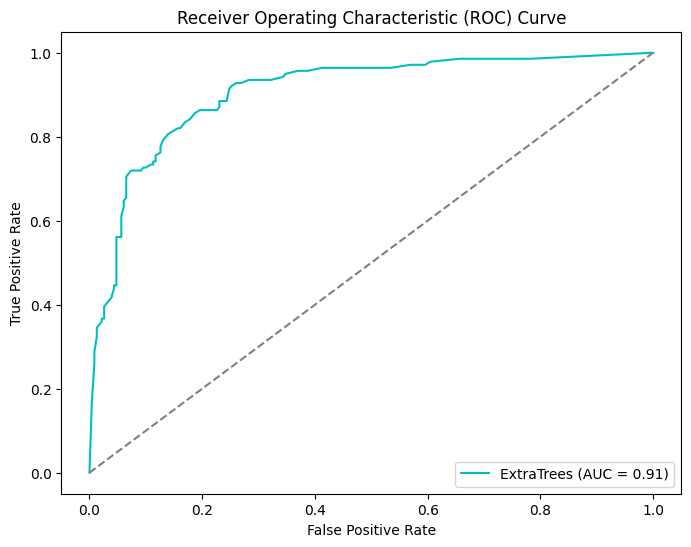

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='c', label=f'ExtraTrees (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(et, X, Y, cv=skf, scoring='accuracy')

print(f"Stratified K-Fold Accuracy: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)} ± {np.std(cv_scores)}")

Stratified K-Fold Accuracy: [0.8699187  0.87804878 0.88617886 0.89430894 0.87804878 0.89430894
 0.89430894 0.90243902 0.89430894 0.90163934]
Mean Accuracy: 0.8893509262961482 ± 0.010313979316098882


In [ ]:
import pickle

# Save model
with open("extratrees_model.pkl", "wb") as model_file:
    pickle.dump(et, model_file)

# Load model
with open("extratrees_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Test loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model Accuracy: {accuracy_score(Y_test, y_pred_loaded)}")

Loaded Model Accuracy: 0.8428184281842819


In [ ]:
import pandas as pd

# Load unknown data
unknown_df = pd.read_excel("/content/All_Feature selection_UK.xlsx")

In [ ]:
# Get the feature names used during training
training_features = loaded_model.feature_names_in_

# Select only the necessary columns from unknown_df, and reorder them
unknown_df = unknown_df.reindex(columns=training_features)

In [ ]:
# Predict class labels
predictions = loaded_model.predict(unknown_df)

# Predict probabilities (if needed)
probabilities = loaded_model.predict_proba(unknown_df)

original_unknown_df = pd.read_excel("/content/All_Feature selection_UK.xlsx")
Names = original_unknown_df["Name"]

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame({
    "Name": Names,
    "Predicted_Class": predictions,
    "Probability_Class_0": probabilities[:, 0],  # Probability of class 0
    "Probability_Class_1": probabilities[:, 1]   # Probability of class 1
})

# Save predictions
predictions_df.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
